In [1]:
# Importing the Packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the german.data file to csv

german_data_df = pd.read_csv(r'..\data\german.data', sep=' ', header=None)
german_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


## Pre-processing

In [3]:
# Adding the Column names

column_names = ['Status', 'Duration_In_Month','Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Since', 'Rate_In_Percentage', 'Personal_Status_Sex', 'Guarantors', 'Present_resident_since', 'Property', 'Age', 'Other_installment_plans', 'Housing', 'Existing_Credits', 'Job', 'Liable_People', 'Telephone', 'Foreign_Worker', 'Cost_Matrix']
german_data_df.columns = column_names
german_data_df.head(5)

,Status,Duration_In_Month,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Rate_In_Percentage,Personal_Status_Sex,Guarantors,...,Property,Age,Other_installment_plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Cost_Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# Replacing the Codes with the Human Readable Values

replace_values_dict = {'A11' : '... < 0 DM', 'A12' : '0 <= ... < 200 DM', 'A13': '... >= 200 DM / salary assignments for at least 1 year', 'A14' : 'no checking account', 'A30' : 'no credits taken/ all credits paid back duly', 'A31' : 'all credits at this bank paid back duly', 'A32' : 'existing credits paid back duly till now', 'A33' : 'delay in paying off in the past', 'A34' : 'critical account/ other credits existing (not at this bank)', 'A40' : 'car (new)', 'A41' : 'car (used)', 'A42' : 'furniture/equipment', 'A43' : 'radio/television', 'A44' : 'domestic appliances', 'A45' : 'repairs', 'A46' : 'education', 'A47' : '(vacation - does not exist?)', 'A48' : 'retraining', 'A49' : 'business', 'A410' : 'others', 'A61' : '... < 100 DM', 'A62' : '100 <= ... < 500 DM', 'A63' : '500 <= ... < 1000 DM', 'A64' : '.. >= 1000 DM', 'A65' : 'unknown/ no savings account', 'A71' : 'unemployed', 'A72' : '... < 1 year', 'A73' : '1 <= ... < 4 years', 'A74' : '4 <= ... < 7 years', 'A75' : '.. >= 7 years', 'A91' : 'male : divorced/separated', 'A92' : 'female : divorced/separated/married' ,'A93' : 'male : single', 'A94' : 'male : married/widowed', 'A95' : 'female : single', 'A101' : 'none', 'A102' : 'co-applicant', 'A103' : 'guarantor', 'A121' : 'real estate', 'A122' : 'if not A121 : building society savings agreement/ life insurance', 'A123' : 'if not A121/A122 : car or other, not in attribute 6', 'A124' : 'unknown / no property', 'A141' : 'bank', 'A142' : 'stores', 'A143' : 'none', 'A151' : 'rent', 'A152' : 'own', 'A153' : 'for free, Job', 'A171' : 'unemployed/ unskilled - non-resident', 'A172' : 'unskilled - resident', 'A173' : 'skilled employee / official', 'A174' : 'management/ self-employed/ highly qualified employee/ officer', 'A191' : 'none', 'A192' : 'yes, registered under the customers name', 'A201' : 'yes', 'A202' : 'no' }
german_data_df.replace(replace_values_dict, inplace=True)
german_data_df.head(5)

,Status,Duration_In_Month,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Rate_In_Percentage,Personal_Status_Sex,Guarantors,...,Property,Age,Other_installment_plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Cost_Matrix
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,"for free, Job",1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,"for free, Job",2,skilled employee / official,2,none,yes,2


In [5]:
# Splitting the Personal Status and Sex Column

german_data_df[['Sex', 'Personal_Status']] = german_data_df['Personal_Status_Sex'].str.split(':', 1, expand=True)

In [6]:
# Removing the combined column of Personal_Status_Sex

german_data_df = german_data_df[['Status', 'Duration_In_Month', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Savings_Account', 'Employment_Since',
       'Rate_In_Percentage', 'Guarantors',
       'Present_resident_since', 'Property', 'Age', 'Other_installment_plans',
       'Housing', 'Existing_Credits', 'Job', 'Liable_People', 'Telephone',
       'Foreign_Worker', 'Personal_Status', 'Sex', 'Cost_Matrix']]
german_data_df.columns

Index(['Status', 'Duration_In_Month', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Savings_Account', 'Employment_Since',
       'Rate_In_Percentage', 'Guarantors', 'Present_resident_since',
       'Property', 'Age', 'Other_installment_plans', 'Housing',
       'Existing_Credits', 'Job', 'Liable_People', 'Telephone',
       'Foreign_Worker', 'Personal_Status', 'Sex', 'Cost_Matrix'],
      dtype='object')

In [7]:
german_data_df.head(5)

,Status,Duration_In_Month,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Rate_In_Percentage,Guarantors,Present_resident_since,...,Other_installment_plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Personal_Status,Sex,Cost_Matrix
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,none,4,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,single,male,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,...,none,own,1,skilled employee / official,1,none,yes,divorced/separated/married,female,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,none,3,...,none,own,1,unskilled - resident,2,none,yes,single,male,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,...,none,"for free, Job",1,skilled employee / official,2,none,yes,single,male,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,...,none,"for free, Job",2,skilled employee / official,2,none,yes,single,male,2


In [8]:
# Checking for any null values in the data set

german_data_df.isna().any()

Status                     False
Duration_In_Month          False
Credit_History             False
Purpose                    False
Credit_Amount              False
Savings_Account            False
Employment_Since           False
Rate_In_Percentage         False
Guarantors                 False
Present_resident_since     False
Property                   False
Age                        False
Other_installment_plans    False
Housing                    False
Existing_Credits           False
Job                        False
Liable_People              False
Telephone                  False
Foreign_Worker             False
Personal_Status            False
Sex                        False
Cost_Matrix                False
dtype: bool

In [9]:
# Writing the processed data into a csv file.

german_data_df.to_csv('../data/german_credit_data_preprocessed.csv')

In [10]:
## Data Analysis

In [12]:
df = pd.read_csv('../data/german_credit_data_preprocessed.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Status,Duration_In_Month,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Rate_In_Percentage,Guarantors,Present_resident_since,...,Other_installment_plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Personal_Status,Sex,Cost_Matrix
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,none,4,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,single,male,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,...,none,own,1,skilled employee / official,1,none,yes,divorced/separated/married,female,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,none,3,...,none,own,1,unskilled - resident,2,none,yes,single,male,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,...,none,"for free, Job",1,skilled employee / official,2,none,yes,single,male,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,...,none,"for free, Job",2,skilled employee / official,2,none,yes,single,male,2


#### What can you say about the features? 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   1000 non-null   object
 1   Duration_In_Month        1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings_Account          1000 non-null   object
 6   Employment_Since         1000 non-null   object
 7   Rate_In_Percentage       1000 non-null   int64 
 8   Guarantors               1000 non-null   object
 9   Present_resident_since   1000 non-null   int64 
 10  Property                 1000 non-null   object
 11  Age                      1000 non-null   int64 
 12  Other_installment_plans  1000 non-null   object
 13  Housing                  1000 non-null   object
 14  Existing_Credits         1000 non-null   

In [14]:
df.describe()

,Duration_In_Month,Credit_Amount,Rate_In_Percentage,Present_resident_since,Age,Existing_Credits,Liable_People,Cost_Matrix
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


#### What are the proportions of applicants belonging to a certain feature?

In [15]:
def hist_plot(feat, dataframe):
    sns.histplot(x=feat, 
                 data=dataframe, 
                 hue='Cost_Matrix', 
                 palette='cool')
    plt.xticks(rotation = 80);

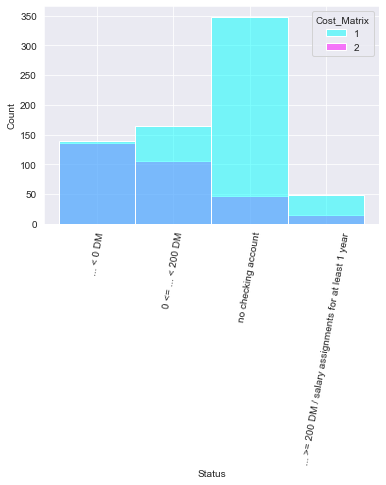

In [16]:
hist_plot('Status', df)

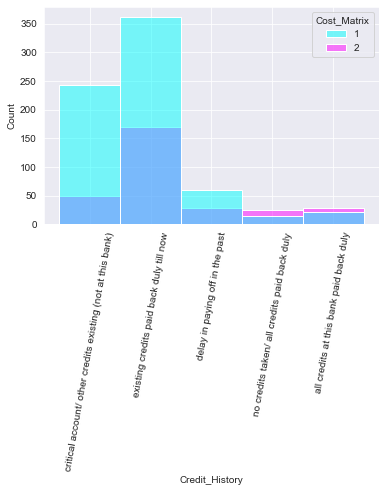

In [17]:
hist_plot('Credit_History', df)

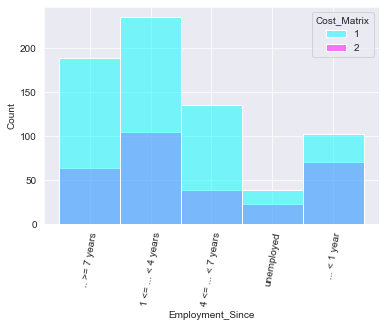

In [18]:
hist_plot('Employment_Since', df)

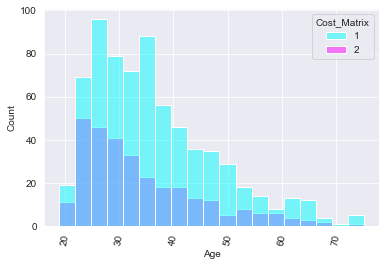

In [19]:
hist_plot('Age', df)

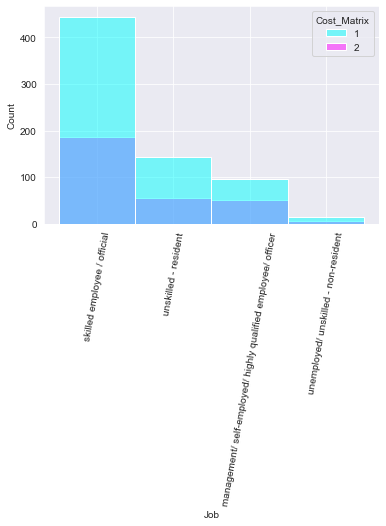

In [20]:
hist_plot('Job', df)

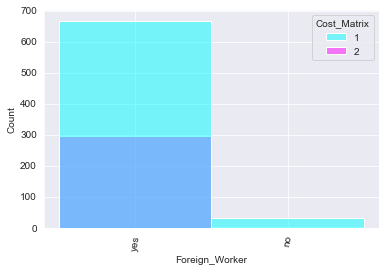

In [21]:
hist_plot('Foreign_Worker', df)

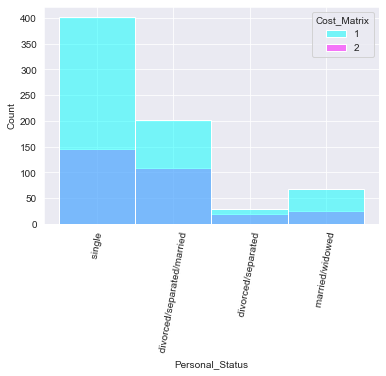

In [22]:
hist_plot('Personal_Status', df)

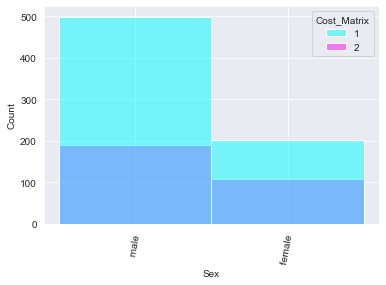

In [23]:
hist_plot('Sex', df)

#### How is the distribution of a feature? 

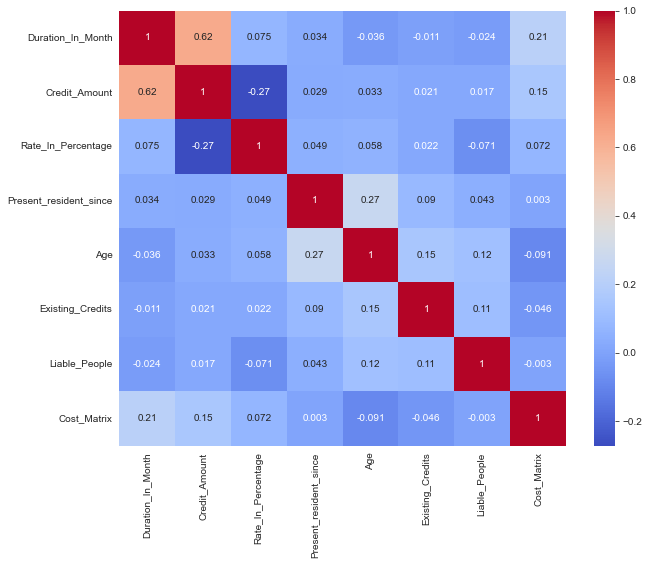

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), cmap='coolwarm', annot=True);

In [25]:
def pie_plot(features, dataframe):
    fig, ax = plt.subplots()
    ax.pie(x=dataframe.value_counts(features).values.tolist(), 
           labels=tuple(dataframe.value_counts(features).keys()),
           autopct='%1.1f%%',
           shadow=True,
           startangle=90)
    ax.axis('equal')
    plt.plot();

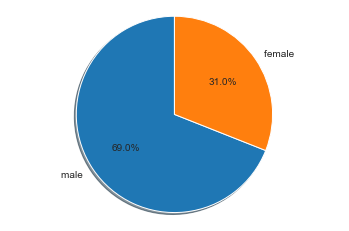

In [26]:
pie_plot('Sex', df)

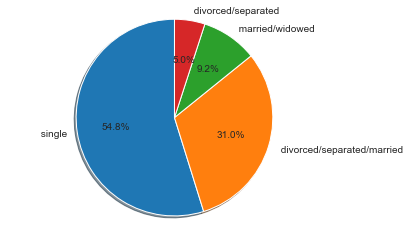

In [27]:
pie_plot('Personal_Status', df)

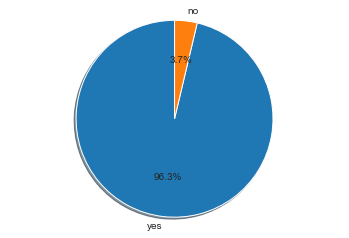

In [28]:
pie_plot('Foreign_Worker', df)

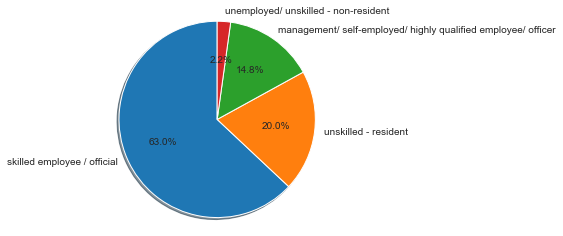

In [29]:
pie_plot('Job', df)

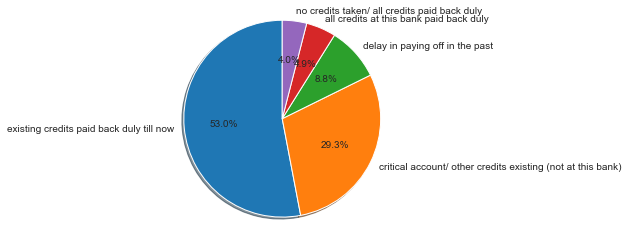

In [30]:
pie_plot('Credit_History', df)

#### Who is considered to have a good or bad credit risk?

In [31]:
df.columns

Index(['Status', 'Duration_In_Month', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Savings_Account', 'Employment_Since',
       'Rate_In_Percentage', 'Guarantors', 'Present_resident_since',
       'Property', 'Age', 'Other_installment_plans', 'Housing',
       'Existing_Credits', 'Job', 'Liable_People', 'Telephone',
       'Foreign_Worker', 'Personal_Status', 'Sex', 'Cost_Matrix'],
      dtype='object')

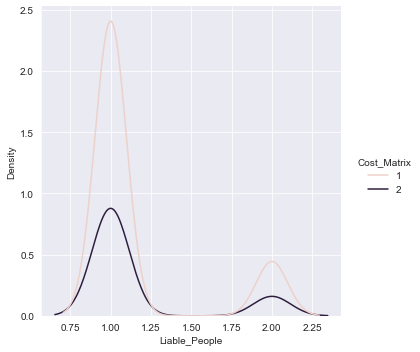

In [32]:
sns.displot(x='Liable_People', data=df, hue='Cost_Matrix', kind='kde');

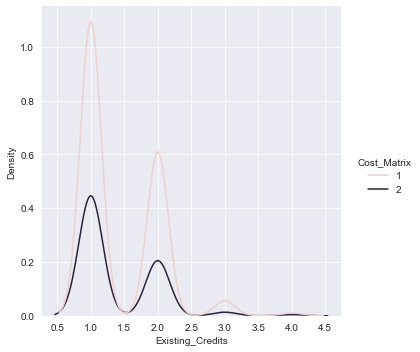

In [33]:
sns.displot(x='Existing_Credits', data=df, hue='Cost_Matrix', kind='kde');

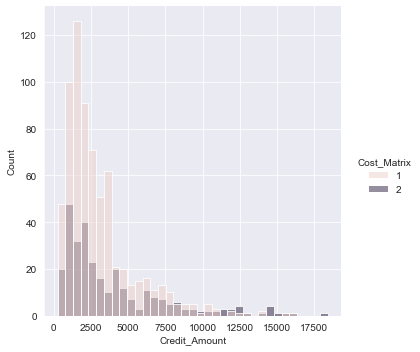

In [34]:
sns.displot(x='Credit_Amount', data=df, hue='Cost_Matrix');